<a href="https://colab.research.google.com/github/Volkovvpp/BSU_classic_ml/blob/main/Covid.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
import geopandas as gpd
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import os
from sklearn.impute import SimpleImputer

In [ ]:
italy_map = gpd.read_file("/content/drive/MyDrive/covid-map/reg2011_g.shp")
covid_data = pd.read_csv("/content/drive/MyDrive/covid-map/Covid.csv")

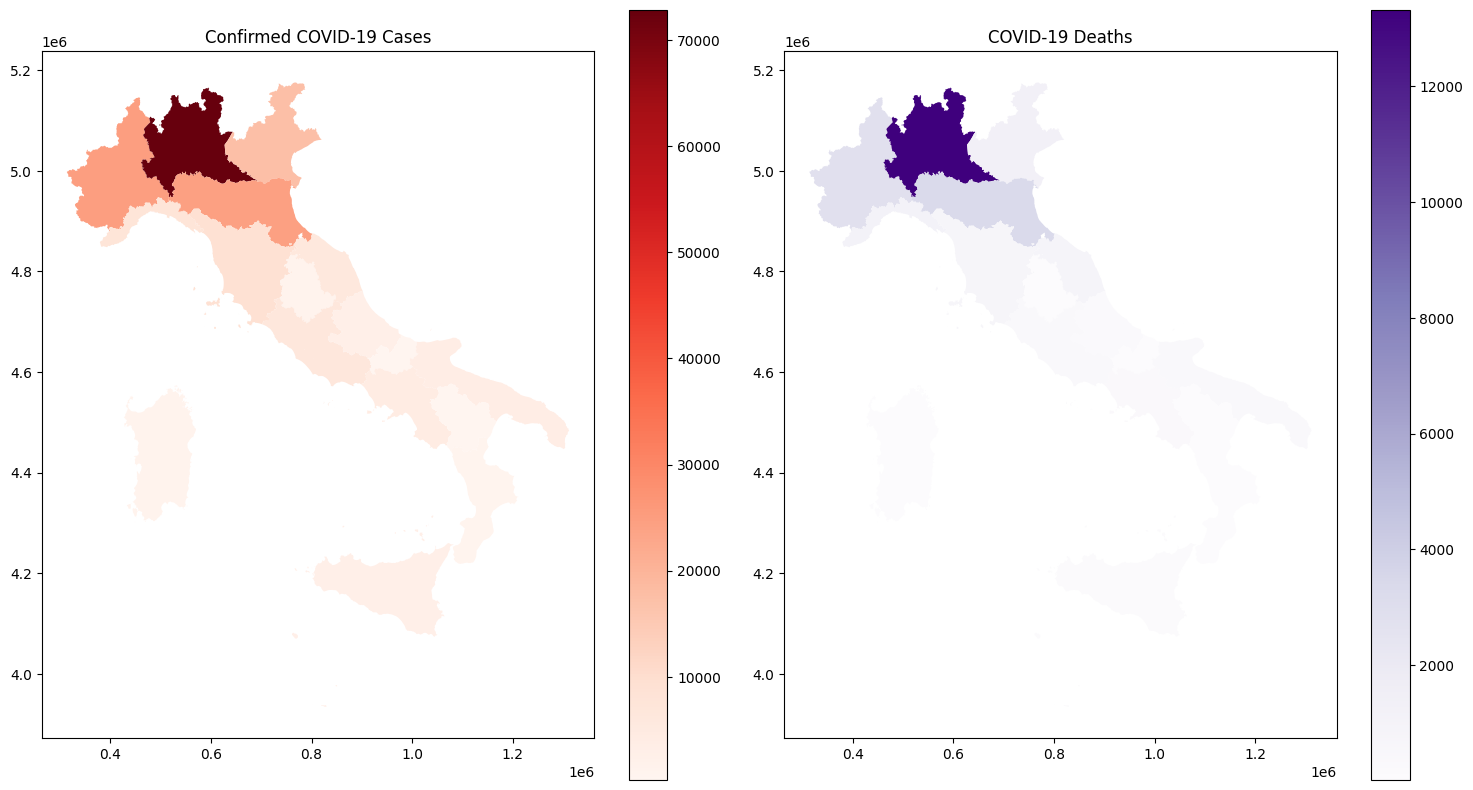

In [ ]:
# Предобработка данных
covid_data["NOME_REG"] = covid_data["NOME_REG"].str.strip().str.lower()
italy_map["NOME_REG"] = italy_map["NOME_REG"].str.strip().str.lower()

# Присоединение COVID-данных
italy_map = italy_map.merge(covid_data, on="NOME_REG", how="left")

# Нормализация числовых данных
scaler = StandardScaler()
covid_scaled = scaler.fit_transform(covid_data[["Confirmed", "Death"]])
covid_data["Confirmed_Scaled"] = covid_scaled[:, 0]
covid_data["Death_Scaled"] = covid_scaled[:, 1]

# Обновлённая карта
fig, ax = plt.subplots(1, 2, figsize=(15, 8))

# Визуализация подтверждённых случаев
italy_map.plot(column="Confirmed", cmap="Reds", legend=True, ax=ax[0])
ax[0].set_title("Confirmed COVID-19 Cases")

# Визуализация смертей
italy_map.plot(column="Death", cmap="Purples", legend=True, ax=ax[1])
ax[1].set_title("COVID-19 Deaths")

plt.tight_layout()
plt.show()

--------------------------------------